In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# PIP Install

In [2]:
!pip install mlxtend

# Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import seaborn as sns


from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,  f1_score, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer, PowerTransformer, KernelCenterer
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC


from qiskit import Aer, execute
from qiskit.utils import QuantumInstance
from qiskit.circuit import QuantumCircuit, Parameter, ParameterVector
from qiskit.circuit.library import HGate, RXGate, RYGate, RZGate, CXGate, CRXGate, CRZGate 
from qiskit.circuit.library import PauliFeatureMap, ZFeatureMap, ZZFeatureMap
from qiskit.circuit.library import TwoLocal, NLocal, RealAmplitudes, EfficientSU2
from qiskit.visualization import plot_state_city
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit_machine_learning.algorithms import QSVC


# Dataframe Implementation Of Seed Dataset

In [4]:
names = ["Area A", "Perimeter P", "Compactness C", "Kernel Length", "Kernel Width", "Asymmetry Coefficient", "Kernel Groove Length", "Species"]
# C = 4*pi*A/P^2, 1 : Kama, 2 : Rosa, 3 : Canadian
dataset = pd.read_csv('seed data/modified.txt', header = None, names = names)

In [5]:
dataset

,Area A,Perimeter P,Compactness C,Kernel Length,Kernel Width,Asymmetry Coefficient,Kernel Groove Length,Species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [6]:
dataset.columns

Index(['Area A', 'Perimeter P', 'Compactness C', 'Kernel Length',
       'Kernel Width', 'Asymmetry Coefficient', 'Kernel Groove Length',
       'Species'],
      dtype='object')

In [7]:
seed_data = dataset.drop(['Species'], axis = 1)
seed_target = dataset.drop(["Area A", "Perimeter P", "Compactness C", "Kernel Length", "Kernel Width", "Asymmetry Coefficient", "Kernel Groove Length"], axis = 1)

In [8]:
seed_data.describe()

,Area A,Perimeter P,Compactness C,Kernel Length,Kernel Width,Asymmetry Coefficient,Kernel Groove Length
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [9]:
seed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Area A                 210 non-null    float64
 1   Perimeter P            210 non-null    float64
 2   Compactness C          210 non-null    float64
 3   Kernel Length          210 non-null    float64
 4   Kernel Width           210 non-null    float64
 5   Asymmetry Coefficient  210 non-null    float64
 6   Kernel Groove Length   210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


# Defining Transformers 

In [10]:
pt = PowerTransformer(method = 'box-cox')
qt = QuantileTransformer(output_distribution = 'normal')
kc = KernelCenterer()

# Exploratory Data Analysis

<AxesSubplot:>

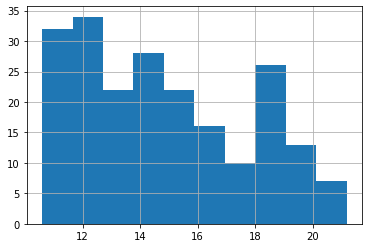

In [11]:
seed_data['Area A'].hist()

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


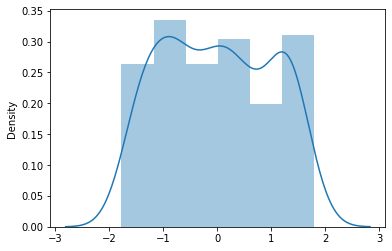

In [12]:
A = pt.fit_transform(np.array(seed_data['Area A']).reshape(-1,1))
sns.distplot(A)
seed_data['Area A'] = A

<AxesSubplot:>

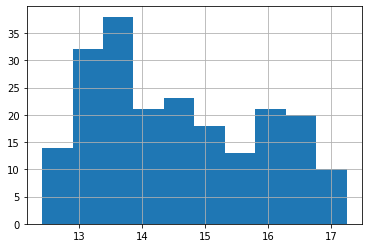

In [13]:
seed_data['Perimeter P'].hist()

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


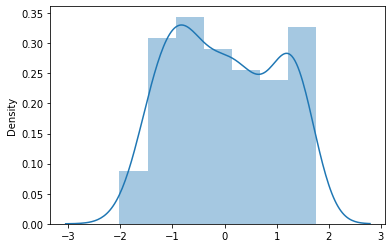

In [14]:
P = pt.fit_transform(np.array(seed_data['Perimeter P']).reshape(-1,1))
sns.distplot(P)
seed_data['Perimeter P'] = P

<AxesSubplot:>

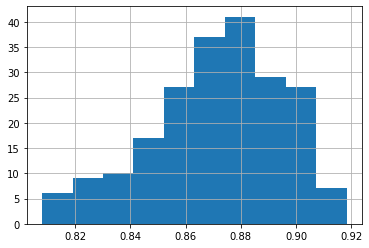

In [15]:
seed_data['Compactness C'].hist()

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


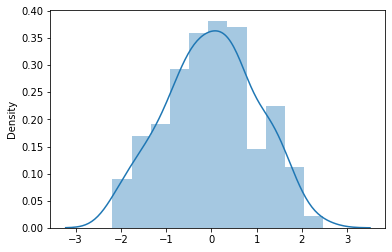

In [16]:

C = pt.fit_transform(np.array(seed_data['Compactness C']).reshape(-1,1))
sns.distplot(C)
seed_data['Compactness C'] = C

<AxesSubplot:>

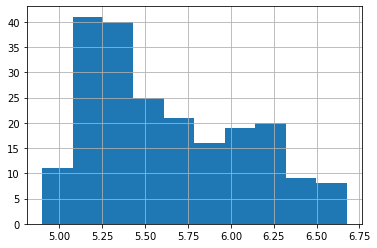

In [17]:
seed_data['Kernel Length'].hist()

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


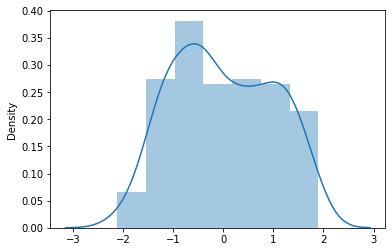

In [18]:
KL = pt.fit_transform(np.array(seed_data['Kernel Length']).reshape(-1,1))
sns.distplot(KL)
seed_data['Kernel Length'] = KL

<AxesSubplot:>

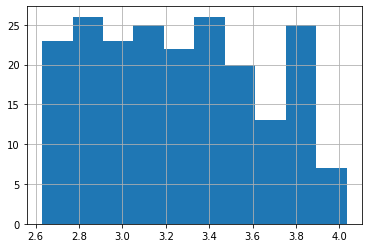

In [19]:
seed_data['Kernel Width'].hist()

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


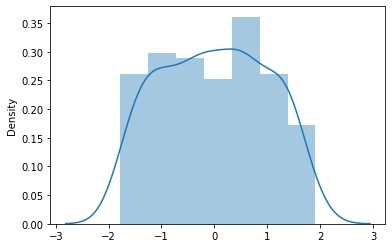

In [20]:
KW = pt.fit_transform(np.array(seed_data['Kernel Width']).reshape(-1,1))
sns.distplot(KW)
seed_data['Kernel Width'] = KW

<AxesSubplot:>

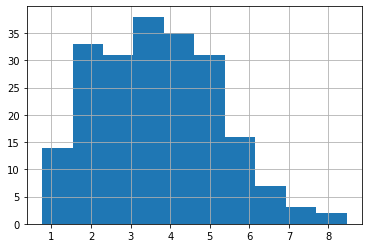

In [21]:
seed_data['Asymmetry Coefficient'].hist()

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


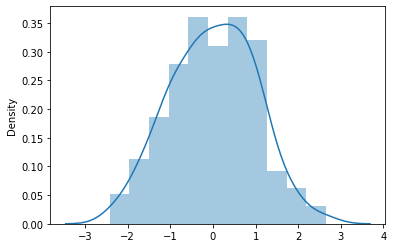

In [22]:
AC = pt.fit_transform(np.array(seed_data['Asymmetry Coefficient']).reshape(-1,1))
sns.distplot(AC)
seed_data['Asymmetry Coefficient'] = AC

<AxesSubplot:>

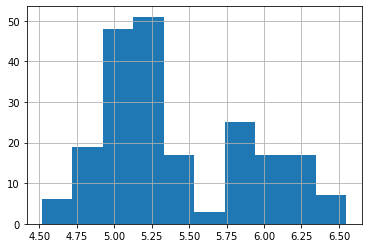

In [23]:


seed_data['Kernel Groove Length'].hist()

/opt/conda/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2583: UserWarning: n_quantiles (1000) is greater than the total number of samples (210). n_quantiles is set to n_samples.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


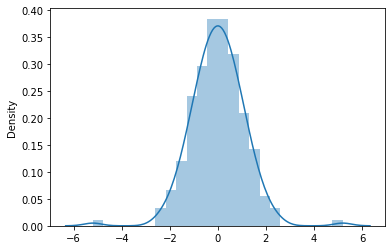

In [24]:
KGL = qt.fit_transform(np.array(seed_data['Kernel Groove Length']).reshape(-1,1))
sns.distplot(KGL)
seed_data['Kernel Groove Length'] = KGL

In [25]:
# Seaborn Style

sns.set_style("darkgrid")

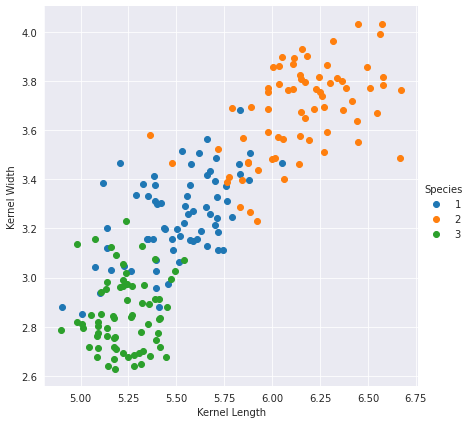

In [26]:
# Sample Scatterplot

sns.FacetGrid(dataset, hue = "Species", height = 6).map(plt.scatter, 'Kernel Length', 'Kernel Width').add_legend()

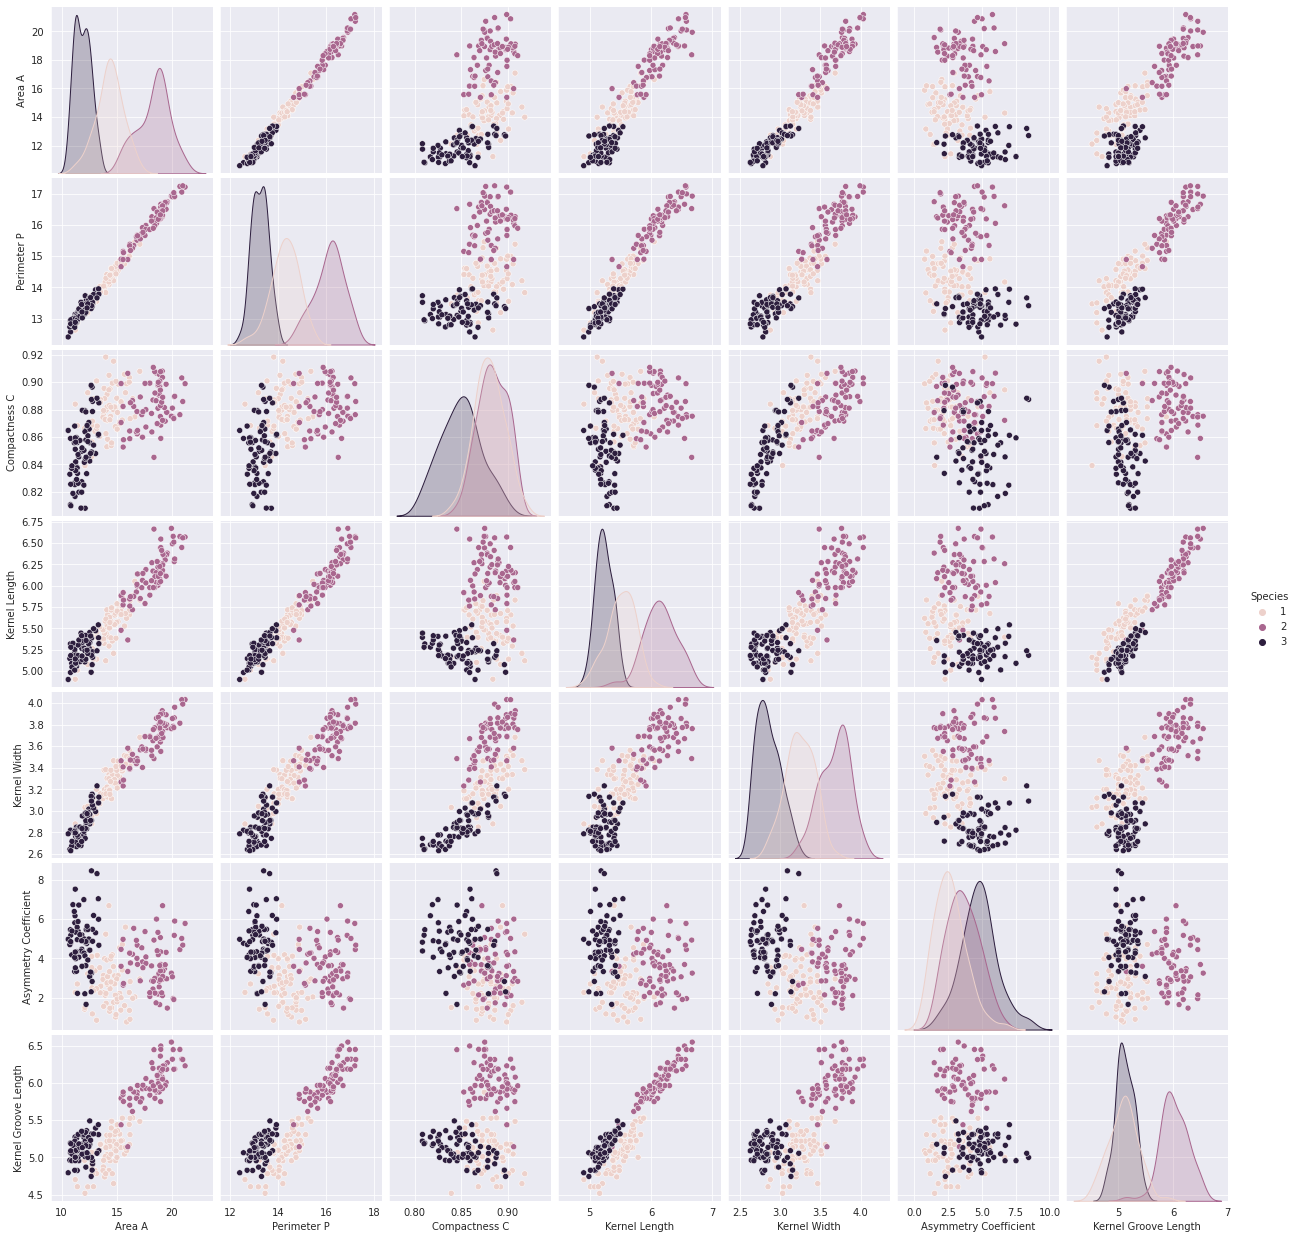

In [27]:
# Pairplot Graph


sns.pairplot(dataset, hue = 'Species')

<AxesSubplot:>

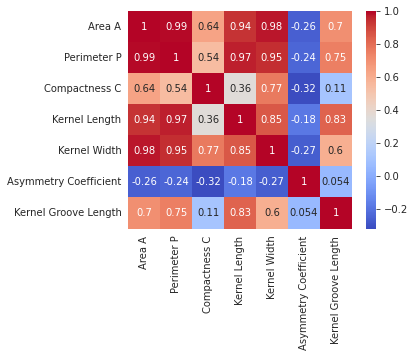

In [28]:
# Correlation HeatMap


corr = seed_data.corr()
fig, ax = plt.subplots(figsize = (5,4))
sns.heatmap(corr, annot = True, ax = ax, cmap = 'coolwarm')  # cmap = 'darkgrid' for light colours


# Splitting of Dataset

In [29]:
area = seed_data['Area A'][:]
perimeter = seed_data['Perimeter P'][:]
compactness = seed_data['Compactness C'][:]
kernel_length = seed_data['Kernel Length'][:]
kernel_width = seed_data['Kernel Width'][:]
asymmetry_coefficient = seed_data['Asymmetry Coefficient'][:]
kernel_groove_length = seed_data['Kernel Groove Length'][:]


In [30]:
X = np.column_stack((area, perimeter, compactness, kernel_length, kernel_width,asymmetry_coefficient, kernel_groove_length))
Y = seed_target

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

# Dataset Engineering

In [32]:
# Reduce dimensions
#n_dim = 5
#pca = PCA(n_components = n_dim).fit(x_train)
#x_train = pca.transform(x_train)
#x_test = pca.transform(x_test)

# Normalise
#std_scale = StandardScaler().fit(x_train)
#x_train = std_scale.transform(x_train)
#x_test = std_scale.transform(x_test)

# Scale
#samples = np.append(x_train, x_test, axis = 0)
#minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
#x_train = minmax_scale.transform(x_train)
#x_test = minmax_scale.transform(x_test)

# Select
#train_size = 100
#x_train = x_train[:train_size]
#y_train = y_train[:train_size]
#test_size = 20
#x_test = x_test[:test_size]
#y_test = y_test[:test_size]

# Classical SVC

In [33]:
C = 1  # Regularlization Parameter
clf_CSVC = make_pipeline(SVC(C = C, decision_function_shape = 'ovo', gamma = 0.1))   # default kernel is ' RBF '
model_CSVC = clf_CSVC.fit(x_train, y_train)  # CSVC Model Creation
CSVC_score = model_CSVC.score(x_test, y_test)   # CSVC Model score against test data

print(f'RBF kernel classification test score: {CSVC_score}')   # best possible score

RBF kernel classification test score: 0.9761904761904762


/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Quantum Instance

In [34]:
# To run the Quantum Kernel
backend = Aer.get_backend('statevector_simulator')
q_instance = QuantumInstance(backend, shots = 1000, seed_simulator = 345, seed_transpiler = 345)

# Feature Map

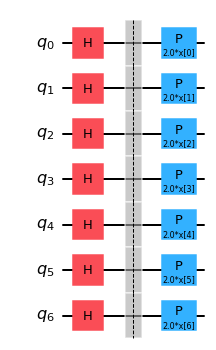

In [35]:
# Feature Map to convert classical data to quantum data, basically a parameterized Quantum Circuit
# Can be used to map seemingly unseparable data to separable form, with respect to hyperplanes, in some higher dimension
# This is achieved by e.g. rotation gate parameters depend on data features, etc.

dim = 7  # Feature Dimension = number of qubits
feature_map = ZFeatureMap(feature_dimension = dim, reps = 1, insert_barriers = True, parameter_prefix = 'x').decompose() 
feature_map.draw('mpl', style = 'iqx')

# Quantum Kernel

In [36]:
# Used to calculate the inner product

q_kernel = QuantumKernel(feature_map = feature_map, quantum_instance = q_instance)

# Sample Quantum Circuit to calculate the inner product
#q_circuit = q_kernel.construct_circuit(x_train[0], x_train[1])
#q_circuit.decompose().decompose().draw(output = 'mpl')

# Job simulation for sample circuit 

In [37]:
# Plotting the counts for each output

#job = execute(q_circuit, backend = backend, shots = 10000, seed_simulator = 345, seed_transpiler = 345)
#counts = job.result().get_counts(q_circuit)

#plot_histogram(counts)


# Kernel Matrix Formulation
# Printing the Kernel Matrix

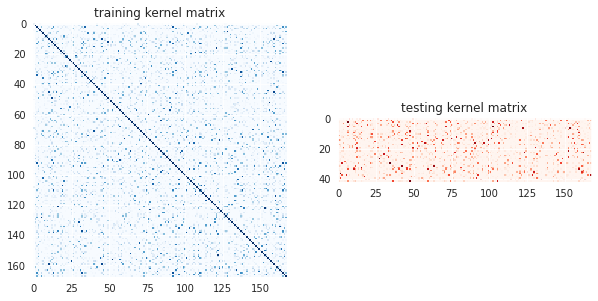

In [38]:
# To calculate the Kernel Matrix


matrix_train = q_kernel.evaluate(x_vec = x_train)
matrix_test = q_kernel.evaluate(x_vec = x_test, y_vec = x_train)

fig, axs = plt.subplots(1, 2, figsize = (10, 5))

axs[0].imshow(np.asmatrix(matrix_train), interpolation = 'nearest', origin = 'upper', cmap = 'Blues')
axs[0].set_title("training kernel matrix")

axs[1].imshow(np.asmatrix(matrix_test), interpolation = 'nearest', origin = 'upper', cmap = 'Reds')
axs[1].set_title("testing kernel matrix")

plt.show()

# Quantum SVC

In [39]:
qpc_svc = make_pipeline(SVC(kernel = 'precomputed', C = 1))   # QSVC precomputed
qpc_svc.fit(matrix_train, y_train)
qpc_score = qpc_svc.score(matrix_test, y_test)

print(f'Precomputed kernel classification test score: {qpc_score}')   # best possible score we got after after trying many combinations

Precomputed kernel classification test score: 0.9523809523809523


/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Decision Region Plotting

<function matplotlib.pyplot.show(close=None, block=None)>

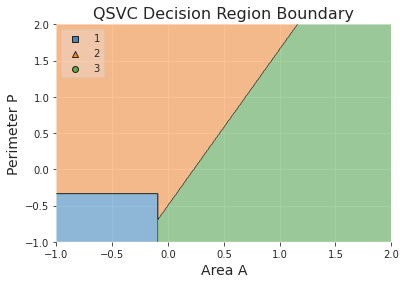

In [40]:
# Plotting Decision regions
# The dimension should be 2 for plotting purposes
# Also choose 2 features of the dataset



y_test = np.array(y_test)
y_test = np.squeeze(y_test)

y_train = np.array(y_train)
y_train = np.squeeze(y_train)

value = 0.01      # np.random.choice(seed_data["Kernel Length"])
width = 0.01      # np.random.choice(seed_data["Kernel Length"])

ffv = {i : value for i in range (2,168)}
ffr = {i : width for i in range (2,168)}

plot_decision_regions(X = matrix_train, y = y_train, clf = qpc_svc, feature_index = [0,1],
                  filler_feature_values = ffv,
                  filler_feature_ranges = ffr,
                  legend = 2)


plt.xlabel(dataset.columns[0], size = 14)
plt.ylabel(dataset.columns[1], size = 14)
plt.title('QSVC Decision Region Boundary', size = 16)
plt.show